## Imports

In [10]:
import time
from timeit import default_timer as timer
import numpy as np
from functools import wraps
import cProfile
import subprocess
NAME = "Phoebe"

## Profiling with cProfile

### cProfile

In [11]:
! python -m cProfile -s cumulative sph.py

         22688878 function calls (22159523 primitive calls) in 44.299 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     14/5    0.042    0.003   44.101    8.820 backend_agg.py:206(get_text_width_height_descent)
     46/2    0.001    0.000   44.073   22.036 text.py:926(get_window_extent)
     78/2    0.371    0.005   42.015   21.008 text.py:358(_get_layout)
6618/3018    0.044    0.000   14.215    0.005 axis.py:1596(_get_tick)
4804/3006    0.036    0.000   13.498    0.004 axis.py:1126(set_clip_path)
      301    2.722    0.009   12.931    0.043 sph.py:111(getAcc)
3612/1814    0.204    0.000   12.852    0.007 axis.py:899(reset_ticks)
      602    0.022    0.000   12.535    0.021 _base.py:1409(clear)
      600    0.003    0.000   12.511    0.021 pyplot.py:1373(cla)
      602    0.081    0.000   12.503    0.021 _base.py:1277(__clear)
      600    0.002    0.000   12.496    0.021 _base.py:1418(cla)
5410/2412    0.071    0.00

In [12]:
! python -m cProfile -o profile.stats sph.py

### snakeviz

In [14]:
! python -m snakeviz profile.stats --server

^C


In [15]:
phoebe_snakeviz.png

<>:1: SyntaxWarning: 'list' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'list' object is not callable; perhaps you missed a comma?
C:\Users\phoeb\AppData\Local\Temp\ipykernel_28824\2351264613.py:1: SyntaxWarning: 'list' object is not callable; perhaps you missed a comma?
  [Here](phoebe_snakeviz.png)


NameError: name 'Here' is not defined

## Profiling with memory_profile

In [7]:
! python -m memory_profiler sph.py

Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(3

In [8]:
! python -m mprof run sph.py

mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)


In [9]:
! python -m mprof plot mprofile_20250123115442.dat

Figure(1260x540)


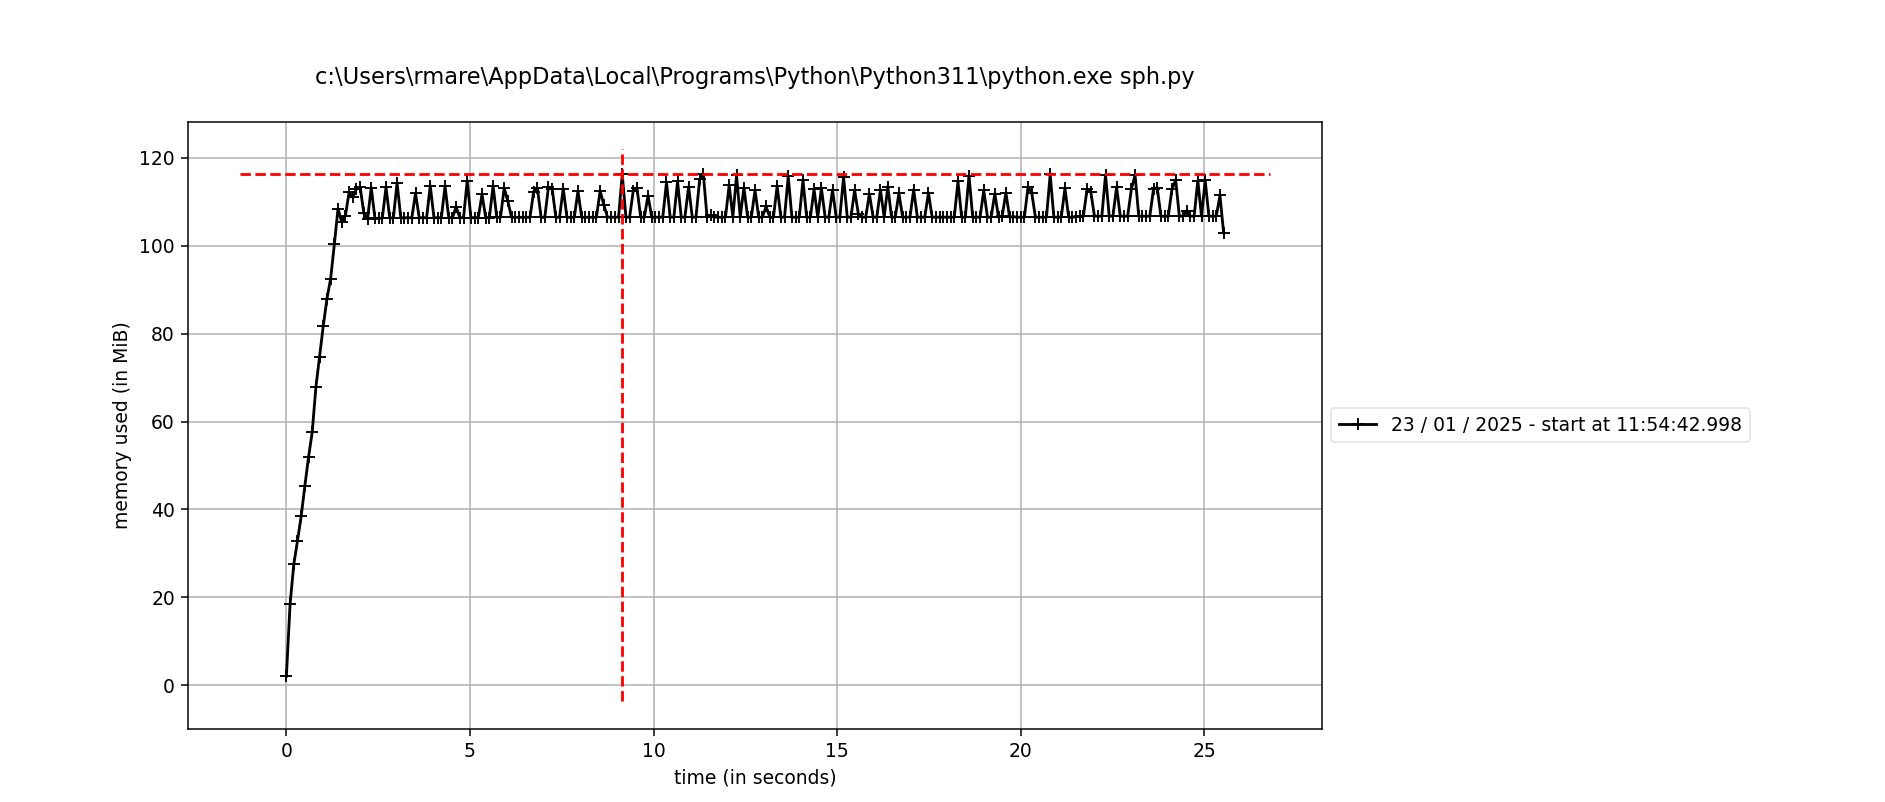

## Profiling with line_profiler

In [13]:
! python -m kernprof -l sph.py

Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(320x400)
Figure(3

In [14]:
! python -m line_profiler -rmt "sph.py.lprof"

Timer unit: 1e-06 s

